In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

/Users/zhengchq/Software/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/zhengchq/Software/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [6]:
import warnings
warnings.filterwarnings('ignore')

In [65]:
plt.rcParams['figure.dpi'] =  80
plt.rcParams['font.family'] =  'Helvetica'
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20

plt.rcParams['axes.labelsize'] = 22
plt.rcParams['axes.labelsize'] = 22
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
plt.rcParams['x.labelsize'] = 20


### figure qqplot

In [37]:
df = pd.read_csv('Data/LDHub_832traits_enrich_h2_srGene_spe.tsv',sep='\t')

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


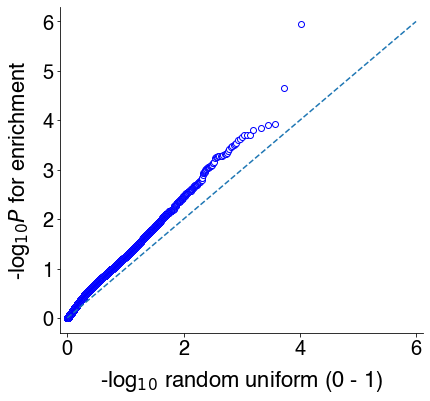

In [38]:
fig,ax = plt.subplots(1,1,figsize=(6.5,6))
sm.qqplot_2samples(-np.log10(df['Enrichment_p_1s']),
                   -np.log10(np.random.uniform(0,1,100000)),ax=ax)
plt.plot((0,6),(0,6),ls='--')
ax.set_ylabel("-log${_1}{_0}P$ for enrichment",fontsize=22,labelpad=10)
ax.set_xlabel("-log${_1}{_0}$ random uniform (0 - 1)",fontsize=22,labelpad=10)

dots = fig.findobj(lambda x: hasattr(x, 'get_color') and x.get_color() == 'b')
[d.set_markerfacecolor('white') for d in dots]
sns.despine()
plt.savefig('figures/qqplot_ldhub_vs_null.pdf',bbox_inches='tight')

### fig3 scatter

In [7]:
df_p = pd.read_csv('Data/fig3.Brains_irQTL_vs_eQTL.xls',sep='\t')

In [8]:
df_p.sort_values('tissue',inplace=True)

In [15]:
df_p['XAEM_P'] = -np.log10(df_p['XAEM_P'])

In [19]:
df_p['GTEX_pval_nominal'] = -np.log10(df_p['GTEX_pval_nominal'])

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


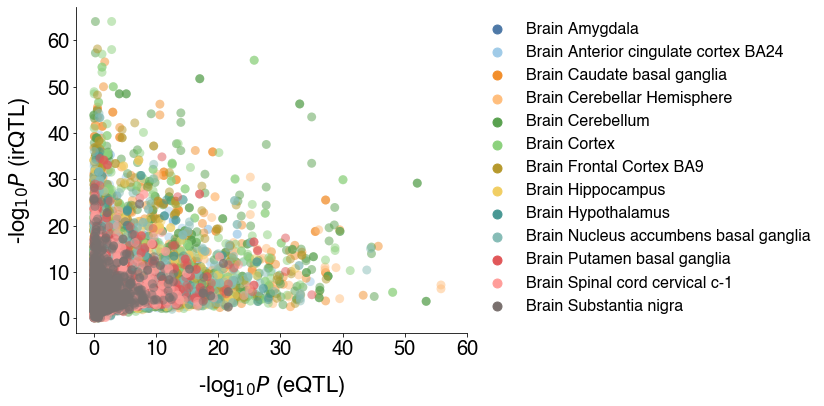

In [44]:
colors = ["#4E79A7","#A0CBE8","#F28E2B","#FFBE7D","#59A14F","#8CD17D","#B6992D","#F1CE63","#499894","#86BCB6","#E15759","#FF9D9A","#79706E"]
fig,ax = plt.subplots(figsize=(7,6))

g = sns.scatterplot(data=df_p,
                x="GTEX_pval_nominal", y="XAEM_P", hue="tissue",alpha=0.5,s=80,linewidth = 0,
                palette=colors
               )


g.set_xlabel('-log${_1}{_0}P$ (eQTL)',fontsize=22,labelpad=15)
g.set_ylabel('-log${_1}{_0}P$ (irQTL)',fontsize=22,labelpad=15)

g.set_xticks(np.arange(0,70,10))

handles, labels = g.get_legend_handles_labels()
g.legend(handles=handles, labels=[i.replace('_',' ') for i in labels],
         markerscale=1.5,
         bbox_to_anchor=(1.0, 1),
         frameon=False,fontsize=16)
sns.despine()
plt.savefig('figures/fig3.scatter_irqtl_vs_eqtl.pdf',bbox_inches='tight')

### heatmap

In [123]:
df = pd.read_csv('Data/fig3B.headmap_ldsc_enrichment_fdr_matrix_-log10_cluster.tsv',sep='\t',index_col=0)

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


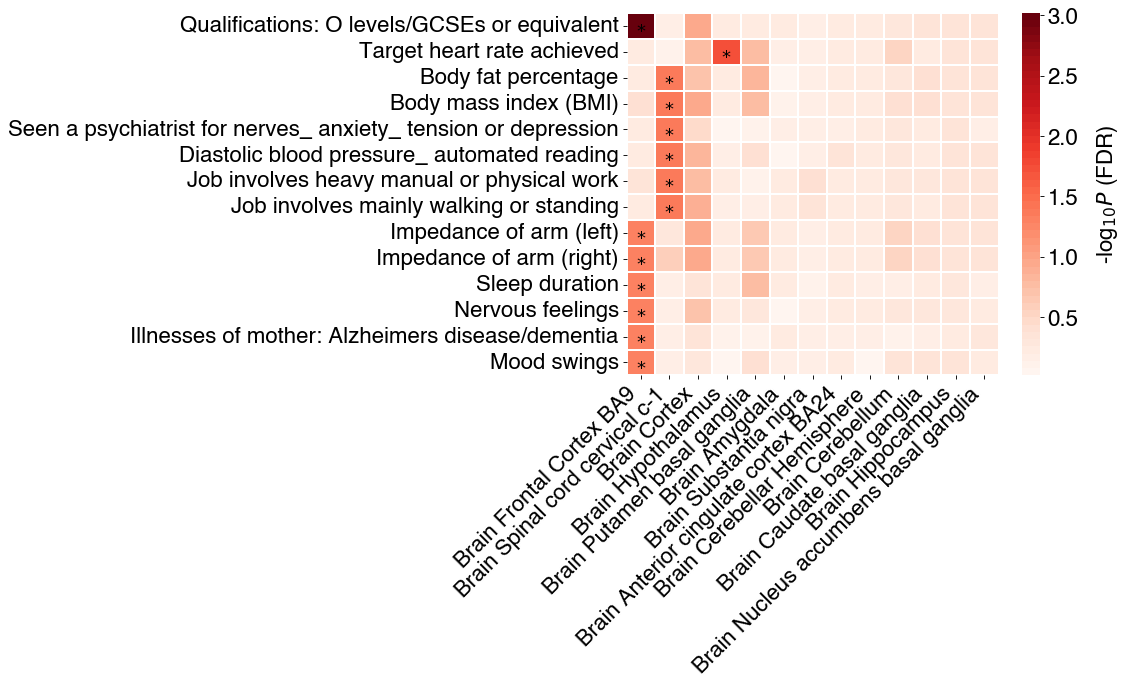

In [127]:
fig,ax = plt.subplots(1,1,figsize=(7.5,6))
info = sns.heatmap(df,
                   cmap=plt.get_cmap("Reds", 50),
                   linewidths=0.05,
                   ax=ax)
ax.set_xticklabels([i.get_text().replace('_', ' ') for i in ax.get_xticklabels()],rotation=45,ha='right');
ax.set_ylabel('')
for i in range(len(df.index)):
        for j in range(len(df.columns)):
            if df.iloc[i,j] >1.3:
                info.text(j + 0.5,i + 0.65,s="$*$",va='center',fontsize=16,ha='center',color='black')

cbar = ax.collections[0].colorbar
cbar.set_label(r'-log${_1}{_0}P$ (FDR)',fontsize=20,labelpad=15)
plt.savefig('figures/fig3.ldsc_enrichment_heatmap.pdf',bbox_inches='tight')

### bboxplot

In [130]:
df = pd.read_csv('Data/fig4.3sig_pair_genotype_splicing_expression.tsv',sep='\t')

In [92]:
np.arange(-2,3)

array([-2, -1,  0,  1,  2])

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


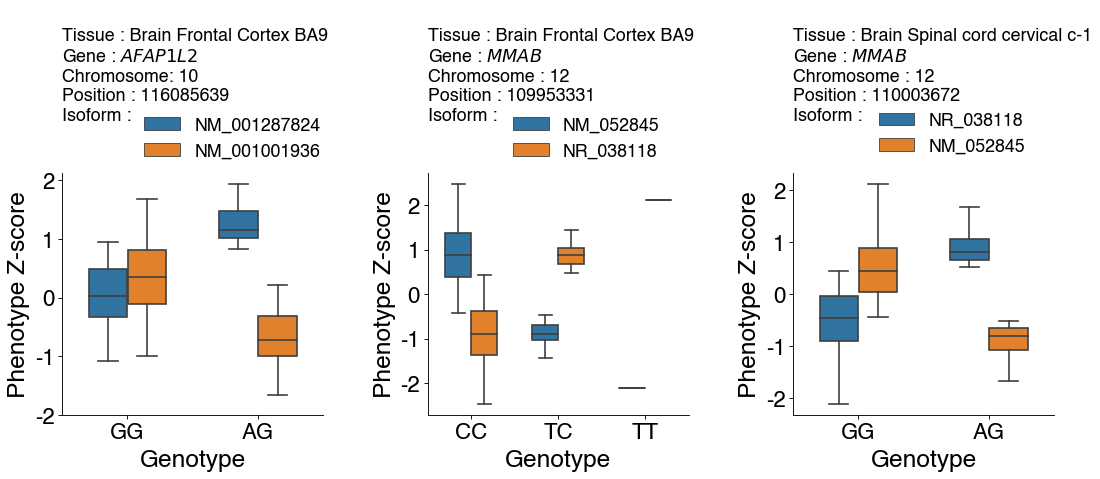

In [186]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,4))

# fig1 10_116085639_G_A_b37 AFAP1L2
sns.boxplot(x="Genotype",y="Zscore", data=df.query('variant_id == "10_116085639_G_A_b37" & gene_name =="AFAP1L2"'),
            hue='Isoform',
            order=['GG','AG'],
            whis=[0, 100], width=.6,ax=ax1)

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor= (1.05, 1.3), \
               frameon = False,fontsize=16,title_fontsize=16)

ax1.set_title(
"""
Tissue : Brain Frontal Cortex BA9
Gene : $AFAP1L2$
Chromosome: 10
Position : 116085639
Isoform :
""",
              x=0,pad=30,horizontalalignment='left',fontsize=16)
ax1.set_ylabel('Phenotype Z-score')
ax1.set_yticks(np.arange(-2,3))


# fig2 12_109953331_C_T_b37 MMAB
sns.boxplot(x="Genotype",y="Zscore", data=df.query('variant_id == "12_109953331_C_T_b37" & gene_name =="MMAB"'),
            hue='Isoform',
            order=['CC','TC','TT'],
            whis=[0, 100], 
            width=.6,ax=ax2)


ax2.legend(bbox_to_anchor= (0.95, 1.3), \
               frameon = False,fontsize=16,title_fontsize=16)
ax2.set_title(
"""
Tissue : Brain Frontal Cortex BA9
Gene : $\it{MMAB}$
Chromosome : 12
Position : 109953331
Isoform :
""",
             x=0,pad=30,horizontalalignment='left',fontsize=16)
ax2.set_ylabel('Phenotype Z-score')
ax2.set_yticks(np.arange(-2,3))



# fig3 12_110003672_G_A_b37 MMAB
sns.boxplot(x="Genotype",y="Zscore", data=df.query('variant_id == "12_110003672_G_A_b37" & gene_name =="MMAB"'),
            hue='Isoform',
            whis=[0, 100], 
            width=.6,ax=ax3)

ax3.legend(bbox_to_anchor= (0.95, 1.32), \
               frameon=False,fontsize=16,title_fontsize=16)
ax3.set_title(
"""
Tissue : Brain Spinal cord cervical c-1
Gene : $MMAB$
Chromosome : 12
Position : 110003672
Isoform : 
""",
              x=0,pad=30,horizontalalignment='left',fontsize=16)
ax3.set_ylabel('Phenotype Z-score')
ax3.set_yticks(np.arange(-2,3))

plt.subplots_adjust(wspace=0.4)
sns.despine()
plt.savefig('figures/fig4.boxplot_snp_gene.pdf',bbox_inches='tight')

In [80]:
ax3.legend?